Mélodie ROSSI L2 SPRINT-B

# Mini-projet 2 : Logistique

Dans notre cas, le comportement du système dynamique est chaotique, c'est-à-dire dont les équations du mouvement sont déterministes : pour une même condition initiale idéale, le système évoluera toujours de la même manière. L'évolution chaotique est extrêmement sensible aux conditions initiales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Présentation mathématique du problème

Cette dynamique peut bien décrire l'évolution d'une population de lapins. On note $n_i$ la population de lapins l'année $i$, et $\alpha$ le nombre de petits par portée (1 portée/an). Alors, $n_{i+1} = \alpha n_i$. Si $\alpha$ est une constante, alors, on obtiendra l'année $p$

$$ n_p = \alpha^p n_0 $$

c'est-à-dire une croissance exponentielle de la population de lapins. 


>Forme récurrente : $n_{i+1} = \alpha n_i,   \forall \alpha$            
>Forme explicite : $ n_p = \alpha^p n_0 $,  $\forall \alpha = cste$

---

Mais la quantité finie de ressources ainsi que les prédateurs va limiter cette croissance séculaire. Cela se traduit mathématiquement par le fait que $\alpha$ ne puisse plus être une constante, mais est une fonction de $n_i$ ainsi que d'autres paramètres. Si l'on note $r$ le taux de croissance maximal et $n_{\max}$ le nombre maximal de lapins qu'il peut exister (en consommant donc toutes les ressources), alors le coefficient $\alpha$ pourrait s'écrire

$$ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $$

On a donc      

$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$

On introduit ensuite la variable $x_i = n_i / n_{\max}$

$$ x_{i+1} = r (1-x_i)x_i $$

que l'on appelle « l'équation logistique ». Pour l'étude de cette équation, on introduit la fonction

$$ f(x) = r (1-x) x $$

dont le seul paramètre est donc $r$. Nous allons voir que suivant les valeurs de $r$, le comportement asymptotique de la suite

$$ x_{i+1} = f(x_i) $$

présente un comportement chaotique.              
$r \in [1,4]$

## Comportement de la suite

Nous cherchons à représenter de façon graphique le comportement de la suite
pour $r=2.5$ et $x_0=0.1$.

In [2]:
#J'initialise les variables

r = 2.5
x_0 = 0.1

$$x_{i+1}=r(1-x_i)x_i$$

Pour représenter graphiquement le comportement de la suite, je dois créer un vecteur x de longueur i, avec i suffisamment grand pour observer le comportement de la suite.


In [3]:
#Je choisis arbitraitement i=25. Je changerai cette valeur si elle ne permet pas d'observer la limite de la suite
i_max=25

Je crée ensuite une fonction f qui me permettra de calculer $x_{j+1}$ en fonction de $x_j$ et r

In [14]:
def f(x_i,r):
    return r*(1-x_i)*x_i

assert(f(1, 1) == 0)
assert(f(0.1,2.5) == 0.225)
a=[2,3]
assert(type(a) == list or type(a) == tuple)

A l'aide d'une boucle for, je calcule les i premières valeurs de la suite et je les ajoute à la liste $x$.            
On cherche à faire une fonction qui va calculer le vecteur $x$ en fonction de $r$ et de $x_0$.

In [15]:
def calcule_x_r(r, x_0, i_max):
    """fonction qui renvoie le vecteur x (de longueur i_max) en fonction de r et x_0
    x est composé des i_max premières valeurs de la suite"""
    x=[x_0]
    for j in range(1,i_max,1): # range de 1 à i par pas de 1
        next_x=f(x[-1],r) # Je passe à la fonction f le dernier élément du vecteur x, celui que je viens d'ajouter à l'itération précédente x_j
        x.append(next_x)
    return x

print(calcule_x_r(r, x_0, i_max),len(calcule_x_r(r, x_0, i_max)))

[0.1, 0.225, 0.43593750000000003, 0.614739990234375, 0.5920868366025388, 0.6038000363113433, 0.5980638811544096, 0.6009586880323345, 0.5995183582769744, 0.6002402409146393, 0.5998797352534377, 0.6000600962142579, 0.5999699428639836, 0.6000150263094296, 0.5999924862808103, 0.600003756718455, 0.5999981216054902, 0.6000009391884339, 0.5999995304035779, 0.6000002347976597, 0.5999998826010323, 0.6000000586994494, 0.5999999706502667, 0.6000000146748645, 0.5999999926625672] 25


On constate que la suite tend vers une limite finie: limite=0.6

### Représentation graphique

Pour préparer la représentation graphique, je crée un vecteur i de longueur i_max

In [16]:
i=[j for j in range(i_max)]

OU BIEN

In [17]:
i=[]
for j in range (i_max):
    i.append(j)

print(i)

#assert(len(i)==len(x))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


Je crée le graphique en utilisant la fonction nuage de points de matplotlib     


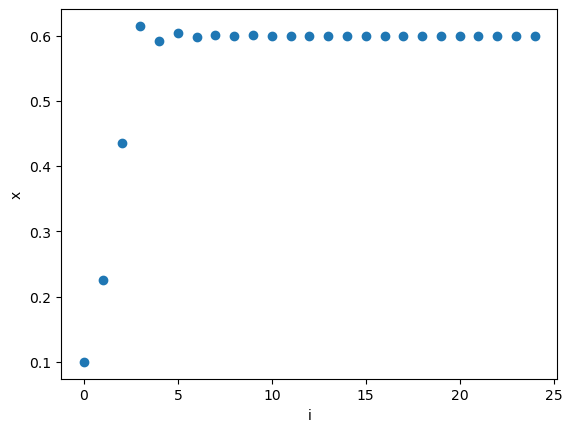

In [18]:
plt.scatter(i, calcule_x_r(r, x_0, i_max))
plt.xlabel("i")
plt.ylabel("x")
plt.show()

On vérifie graphiquement que la suite tend vers une limite finie de 0.6

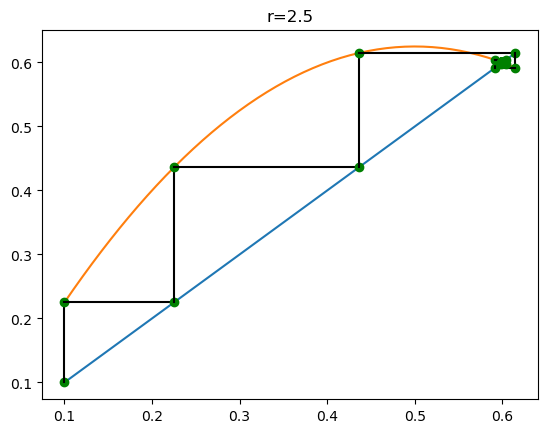

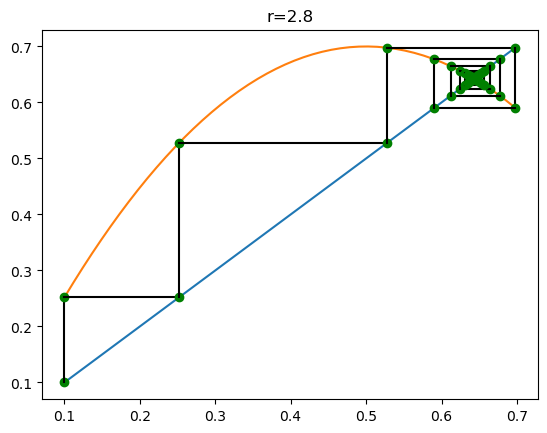

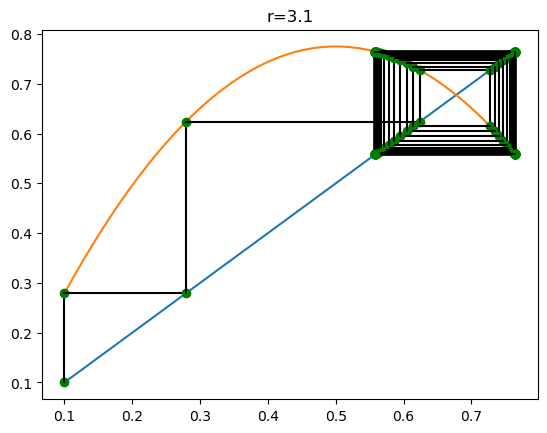

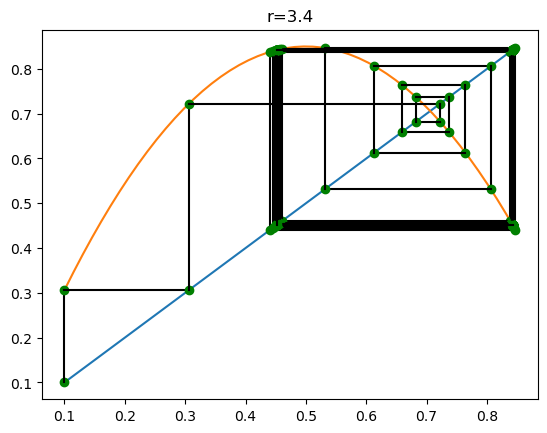

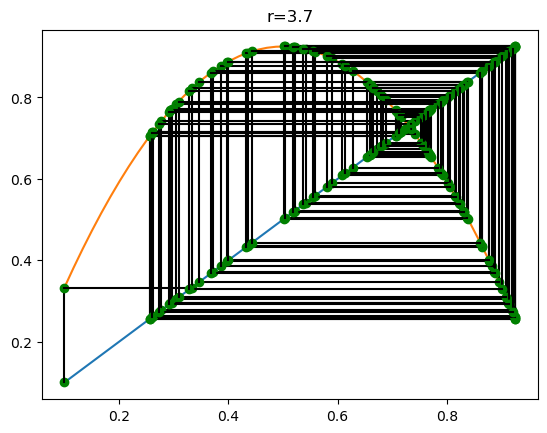

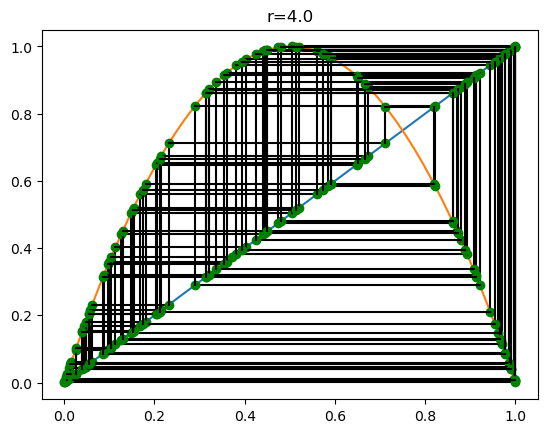

In [19]:
def liste_elements(r,x0,N):
    lst_elements=[x0]
    for k in range(N-1):
        lst_elements.append(f(lst_elements[-1],r))
    return lst_elements

def plot_U_r(r,x_o,N,xb,xe):
    #Intialisation de la suite
    u0=x_0
    # Tracé de la bissectrice et de la fonction f
    x = np.linspace(xb, xe)
    plt.plot(x, x)
    plt.plot(x, f(x,r))

    # Initialisation
    plt.plot([u0], [u0], 'og')

    # Récurrence
    for k in range(N):
        # Étape 2 : image du point U0 avec une ligne
        #   verticale -> U_01
        u1 = f(u0,r)
        plt.plot([u0, u0], [u0, u1], 'k')
        plt.plot([u0], [u1], 'og')
        # Étape 3 : placer le point U1 sur la bissectrice
        #   avec une ligne horizontale depuis U_01
        plt.plot([u0, u1], [u1, u1], 'k')
        plt.plot([u1], [u1], 'og')
        # Récurrence :
        u0 = u1
    title="r="+str(r)
    plt.title(title)
    plt.show()

r=np.linspace(2.5,4,6)
x_0=0.1
N=100

for k in range(len(r)):
    lst=liste_elements(r[k],x_0,N)
    # Limites des abscisses et nombre de récurrence
    xb=min(lst)
    xe=max(lst)
    plot_U_r(r[k],x_0,N,xb,xe)

Choisir d'autres valeurs de $r$ comprises entre 2.5 et 4. Que constatez-vous ?

In [20]:
nbr_r = 3 # nombre de valeurs de r

val_r = np.linspace(2.5, 4.0, nbr_r) # valeurs de r

print(val_r)

[2.5  3.25 4.  ]


Je cherche à plotter un graphe par valeur de r.
- il me faut les valeurs de x pour chaque r

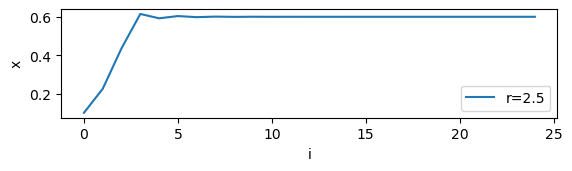

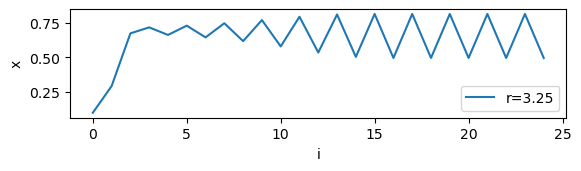

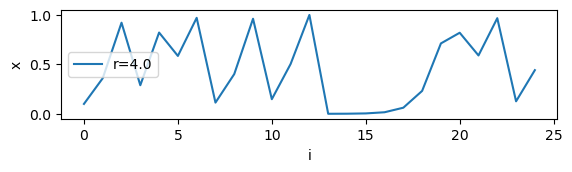

In [21]:
#x_r_1=calcule_x_r(val_r[0], x_0, i_max)
#plt.scatter (i, x_r_1)

x_r=[]

index_x_r=np.linspace(1, nbr_r, nbr_r)

for l in range (nbr_r):
    x_r_l=calcule_x_r(val_r[l], x_0, i_max)
    x_r.append(x_r_l)
    #subplots
    plt.subplot(nbr_r, 1, int(index_x_r[l]))
    plt.plot(i, x_r[l], label=f"r={val_r[l]}")
    plt.xlabel("i")
    plt.ylabel("x")
    plt.legend()
    plt.show()

Plus la valeur de $r$ progresse vers $4$, plus elle semble ne pas avoir de limite et être plus chaotique.

## Diagramme de bifurcation

On cherche à étudier la manière dont cette limite dépend de la valeur de $r$.

Pour cela, vous allez prendre un grand nombre de valeurs de $r$ comprises entre 2.5 et 4, mais toujours $x_0=0.00001$.

In [22]:
x_01 = 0.00001

nbr_r1 = 1000 # nombre de valeurs de r

val_r1 = np.linspace(2.5, 4.0, nbr_r1) # valeurs de r

On cherche à calculer les 1000 premiers termes de la suite, et en garder les 100 derniers.

Si la limite est bien définie, ces 100 derniers termes devraient être très semblables, ce qui n'est pas toujours le cas.

> On crée d'abord une fonction qui, pour chaque valeur de r, calcule les 1000 premiers termes puis sélectionne les 100 derniers

In [23]:
def liste_elements(r,x0,N):
    lst_elements=[x0]
    for k in range(N-1):
        lst_elements.append(f(lst_elements[-1],r))
    return lst_elements

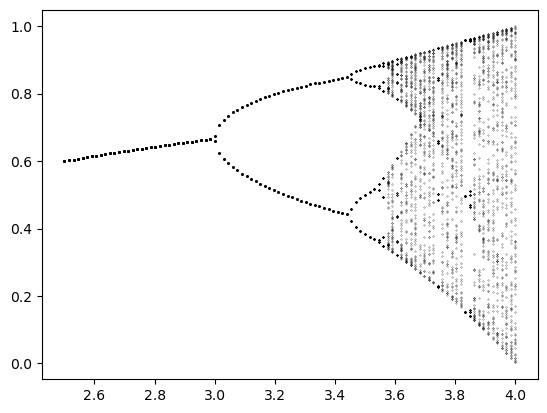

In [24]:
r=np.linspace(2.5,4,100)
nb_elements=nbr_r1
for k in range(len(r)):
    #calcule la liste des 1000 premières valeurs de la suite
    lst=liste_elements(r[k],x_01,nb_elements)
    #conserve les 100 dernières valeurs de la lisste
    last_100=lst[-100:]
    #créé un vecteur contenant 100 fois la valeur de r
    r_abscisse=r[k]*np.ones(100)
    plt.plot(r_abscisse,last_100,'k.', markersize=0.4)


Que pouvez-vous en conclure sur la manière dont la limite de l'équation logistique dépend du paramètre $r$ ? Est-ce que le diagramme de bifurcation dépend de la valeur de $x_0$ ?

Plus la valeur de $r$ progresse vers 4, plus l'équation logistique diverge.      
De plus, le diagramme de bifurcation ne semble pas dépendre de la valeur de $x_0$, si sa valeur est petite.

## Exposant de Lyapunov

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

On calcule pour chacune des valeurs de $r$ uniformément distribuées entre 2.5 et 4 la valeur de l'exposant de Lyapunov.
Sur un graphique, vous tracerez un point pour chacun des couples $(r, \lambda)$ que vous avez obtenu. Pour rendre le graphique plus
lisible, vous pourrez tracer un point noir lorsque $\lambda < 0$ et un point rouge lorsque $\lambda > 0$. Vous pourrez aussi
tracer sur votre graphique une ligne horizontale bleue pour $\lambda = 0$ pour marquer la différence entre les valeurs stables et
instables de $\lambda$.


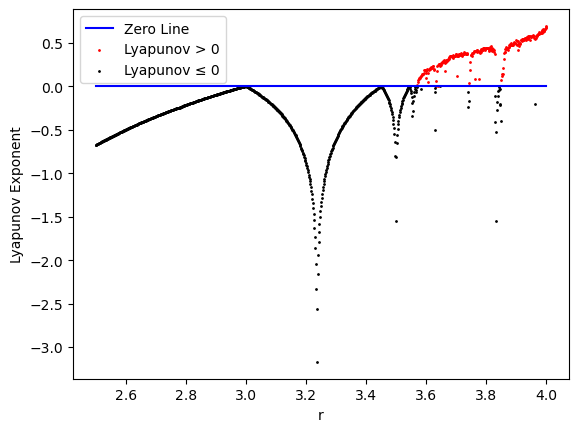

In [76]:
r_Ly = np.linspace(2.5, 4.0, nbr_r1)

# Definir la dérivée de la fonction logistique
def f_prime(r, x):
    return r * (1 - 2 * x)

# Exposant de Lyapunov
def lambda_r(r, x0, n):
    x = x0
    lyapunov_exp = np.zeros(len(r))

    for j in range(len(r)):
        x = x0  # Réinitialise la condition pour chaque r
        sum_lg = 0

        for i in range(n):
            x = r[j] * x * (1 - x) 
            derivative = np.abs(f_prime(r[j], x))
            sum_lg += np.log(derivative)

        lyapunov_exp[j] = sum_lg / n

    return lyapunov_exp

# Conditions initiales
x_01 = 0.00001  
n_iterations = 1000

# Calcule exposants de Lyapunov
lyapunov_values = lambda_r(r_Ly, x_01, n_iterations)

# Separe les valeurs pour les couleurs
positive_indices = lyapunov_values > 0
negative_indices = lyapunov_values <= 0

# Plot
plt.plot(r_Ly, np.zeros(len(r_Ly)), 'b', label="Zero Line")  # Zero reference line
plt.scatter(r_Ly[positive_indices], lyapunov_values[positive_indices], s=1, color='red', label="Lyapunov > 0")
plt.scatter(r_Ly[negative_indices], lyapunov_values[negative_indices], s=1, color='black', label="Lyapunov ≤ 0")

plt.xlabel("r")
plt.ylabel("Lyapunov Exponent")
plt.legend()
plt.show()


Comparez ce graphique au diagramme de bifurcation. Que pouvez-vous en conclure sur la stabilité de l'équation logistique ?

Quand le diagramme montre du chaos, $λ$ devient positif.